In [ ]:
Universidad Nacional Abierta y a Distancia - UNAD
Yesid Stiven Toloza Ruiz


In [32]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [33]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [69]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('car details v4.csv')
Datos.head

<bound method NDFrame.head of                Make                                  Model    Price  Year  \
0             Honda                    Amaze 1.2 VX i-VTEC   505000  2017   
1     Maruti Suzuki                        Swift DZire VDI   450000  2014   
2           Hyundai                   i10 Magna 1.2 Kappa2   220000  2011   
3            Toyota                               Glanza G   799000  2019   
4            Toyota        Innova 2.4 VX 7 STR [2016-2020]  1950000  2018   
...             ...                                    ...      ...   ...   
2054       Mahindra                  XUV500 W8 [2015-2017]   850000  2016   
2055        Hyundai                           Eon D-Lite +   275000  2014   
2056           Ford            Figo Duratec Petrol ZXI 1.2   240000  2013   
2057            BMW  5-Series 520d Luxury Line [2017-2019]  4290000  2018   
2058       Mahindra      Bolero Power Plus ZLX [2016-2019]   670000  2017   

      Kilometer Fuel Type Transmission    Loc

Intercepto (β0): -450043130.43488836
Coeficiente (Year, β1): [224033.13859185]


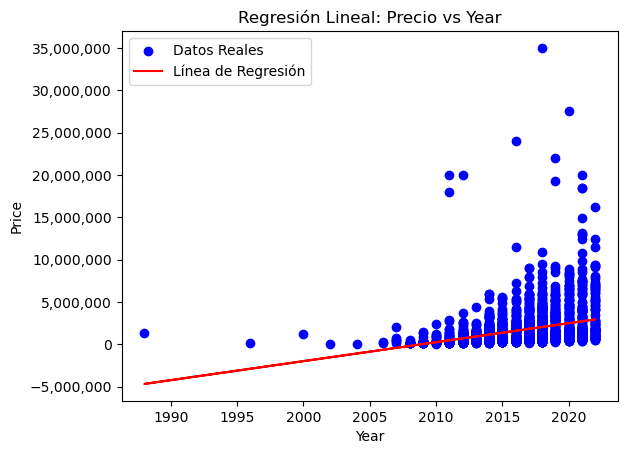

In [61]:
import matplotlib.ticker as ticker


# Convertir los datos en un DataFrame
df = pd.DataFrame(Datos)

# Variables independientes (Tamaño y Habitaciones) y dependiente (Precio)
X = df[['Year']]
y = df['Price']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1 = modelo.coef_  # Pendientes 

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Year, β1): {beta_1}")

# Visualizar la regresión (opcional para datos simples)
plt.scatter(df['Year'], y, color='blue', label='Datos Reales')
plt.plot(df['Year'], modelo.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Precio vs Year')
plt.xlabel('Year')
plt.ylabel('Price')

# Cambiar el formato del eje Y para que muestre los precios como enteros
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Sin decimales
# Si necesitas que muestre dos decimales, usa '{x:,.2f}' en su lugar

plt.legend()
plt.show()

In [62]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[2010], [2019]])  # Nuevos valores (Año)
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Year: {nuevo_X[i][0]}): {pred:.2f} USD")


Predicciones:
Predicción 1 para (Year: 2010): 263478.13 USD
Predicción 2 para (Year: 2019): 2279776.38 USD


C:\Users\ystol\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Regresion Lineal Multiple

In [63]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos2 = pd.read_csv('car details v4.csv')

Intercepto (β0): -422312442.43311626
Coeficiente (Year, β1): 210353.47933121334
Coeficiente (Kilometer, β2): -2.704946132791293


C:\Users\ystol\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


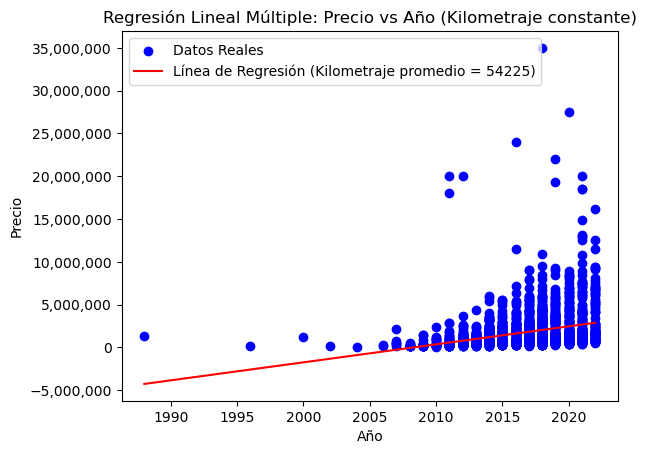

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker

# Supongamos que 'Datos' es tu nuevo conjunto de datos, que ya has convertido a un DataFrame
df = pd.DataFrame(Datos2)

# Variables independientes (Year y Kilometer) y dependiente (Price)
X = df[['Year', 'Kilometer']]
y = df['Price']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1, beta_2 = modelo.coef_  # Pendientes 

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Year, β1): {beta_1}")
print(f"Coeficiente (Kilometer, β2): {beta_2}")

# Visualizar la regresión (opcional, dado que hay múltiples variables)
# Se puede graficar la relación entre Price y Year manteniendo Kilometer constante
kilometraje_fijo = df['Kilometer'].mean()  # Fijar el kilometraje en su media
year_range = np.linspace(df['Year'].min(), df['Year'].max(), 100)

# Predecir manteniendo el Kilometraje constante
predicciones_fijas = modelo.predict(np.column_stack((year_range, np.full_like(year_range, kilometraje_fijo))))

# Graficar los datos reales y la línea de regresión
plt.scatter(df['Year'], y, color='blue', label='Datos Reales')
plt.plot(year_range, predicciones_fijas, color='red', label=f'Línea de Regresión (Kilometraje promedio = {kilometraje_fijo:.0f})')
plt.title('Regresión Lineal Múltiple: Precio vs Año (Kilometraje constante)')
plt.xlabel('Año')
plt.ylabel('Precio')

# Cambiar el formato del eje Y para que muestre los precios como enteros
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Sin decimales

plt.legend()
plt.show()


In [67]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[2011, 50000], [2018, 650000]])  # Nuevos valores (Year, Kilometer)
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Year: {nuevo_X[i][0]}, Kilometer: {nuevo_X[i][1]}): {pred:.2f} USD")


Predicciones:
Predicción 1 para (Year: 2011, Kilometer: 50000): 573157.20 USD
Predicción 2 para (Year: 2018, Kilometer: 650000): 422663.87 USD


C:\Users\ystol\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [68]:
# Importar librerías necesarias
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[['Year', 'Kilometer']]
y = df['Price']

# Definir el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(X, y)

# Realizar predicciones en los datos de entrenamiento
predicciones = model.predict(X)

# Calcular las métricas de evaluación
r2 = r2_score(y, predicciones)  # Coeficiente de determinación R²
mae = mean_absolute_error(y, predicciones)  # Error Absoluto Medio
mse = mean_squared_error(y, predicciones)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

R² (Coeficiente de determinación): 0.10071937455974644
Error Absoluto Medio (MAE): 1345814.9081413953
